In [7]:
import tensorflow as tf
import keras

# Print TensorFlow and Keras versions
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


TensorFlow version: 2.17.0
Keras version: 3.6.0


In [13]:
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv('Wine.csv')

# Explore the dimensions of the dataset
print(f"Dataset dimensions: {wine_data.shape}")


Dataset dimensions: (1599, 12)


In [14]:
# Check for null values
print(wine_data.isnull().sum())

# Identify categorical variables (if any)
categorical_cols = wine_data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Encode categorical variables if present
wine_data = pd.get_dummies(wine_data, columns=categorical_cols, drop_first=True)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical columns: Index(['quality'], dtype='object')


In [15]:
df = wine_data

In [20]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_good'],
      dtype='object')


In [21]:
# Separate the features and target
y = wine_data['quality_good']
# Assuming 'quality' is the target



In [22]:
X = df.drop(columns=['quality_good'])  

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a neural network architecture with 2 hidden layers
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


C:\Users\Pratik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Define the TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')


In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=32,
                    callbacks=[tensorboard_callback, early_stopping, checkpoint])


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6153 - loss: 0.6603 - val_accuracy: 0.6719 - val_loss: 0.6121
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7522 - loss: 0.5616 - val_accuracy: 0.7266 - val_loss: 0.5679
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7557 - loss: 0.4946 - val_accuracy: 0.7500 - val_loss: 0.5520
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7588 - loss: 0.4947 - val_accuracy: 0.7617 - val_loss: 0.5551
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7629 - loss: 0.5010 - val_accuracy: 0.7656 - val_loss: 0.5515
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7713 - loss: 0.4881 - val_accuracy: 0.7734 - val_loss: 0.5462
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7699 - loss: 0.4884 - val_accuracy: 0.7578 - val_loss: 0.5400
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7457 - loss: 0.5080 - val_accuracy: 0.7695 - val_loss

In [39]:
model.get_weights()


[array([[ 4.37118448e-02,  2.49173388e-01,  7.32866600e-02,
         -3.05646099e-02, -2.11887598e-01, -1.46181405e-01,
          1.03540845e-01,  1.30834989e-02, -1.14607520e-01,
          9.48740169e-02,  2.70144731e-01, -1.72900379e-01,
         -1.29886061e-01,  2.16118857e-01,  5.93080670e-02,
          4.71885428e-02, -2.02943042e-01,  6.63668439e-02,
          1.95148975e-01,  1.14652492e-01,  1.96784645e-01,
          1.90928280e-01,  1.00351557e-01, -1.43241525e-01,
         -3.23130041e-02,  2.55337447e-01, -2.20129769e-02,
         -3.78275365e-02, -8.41340721e-02, -1.28200138e-02,
         -6.30023936e-03,  3.04445196e-02,  7.78405815e-02,
         -8.75679255e-02,  1.02855429e-01,  2.32991681e-01,
         -1.57901391e-01,  2.94685602e-01,  2.34046578e-01,
         -2.32945532e-01,  1.80205435e-01, -2.31093735e-01,
         -1.25040084e-01, -1.37957364e-01,  2.00457051e-01,
         -9.21944380e-02, -2.19952628e-01, -2.11020708e-01,
         -2.72061765e-01,  2.20653892e-0

In [40]:
history_df = pd.DataFrame(history.history)
print(history_df.head())


   accuracy      loss  val_accuracy  val_loss
0  0.652004  0.637093      0.671875  0.612085
1  0.736070  0.553210      0.726562  0.567887
2  0.734115  0.524977      0.750000  0.551987
3  0.742913  0.510220      0.761719  0.555085
4  0.750733  0.500452      0.765625  0.551547


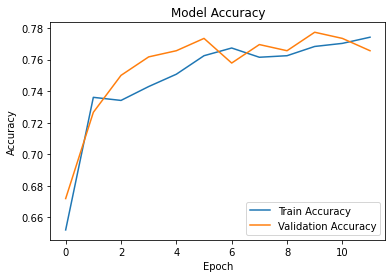

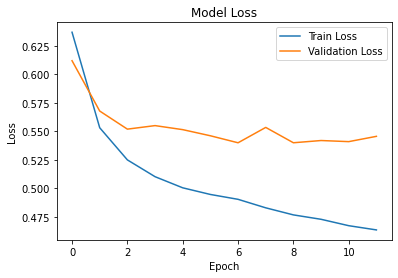

In [41]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.5013
Test Loss: 0.5078848600387573
Test Accuracy: 0.721875011920929
